- Plotting time series
- Using resample to identify trends in your time series 

In [1]:
ls

KCPD_Crime_Data_2014.csv
KCPD_Crime_Data_2015.csv
KCPD_Crime_Data_2016.csv
KCPD_Crime_Data_2017.csv
KCPD_Crime_Data_2018.csv
Lecs.ipynb
Untitled.ipynb
dsc-3-25-03-managing-time-series-data-lab/
dsc-3-25-03-managing-time-series-data-lab-online-ds-ft-100118/


In [28]:
import pandas as pd
import matplotlib.pyplot as plot
import glob
import os
import matplotlib.pyplot as plt

In [4]:
pwd

'/Users/jeffreyherman/Desktop/Course/Study_Sess/Mod_3/Section_25'

In [6]:
path = '/Users/jeffreyherman/Desktop/Course/Study_Sess/Mod_3/Section_25'

my_csvs = glob.glob(os.path.join(path, '*.csv'))

In [7]:
my_csvs

['/Users/jeffreyherman/Desktop/Course/Study_Sess/Mod_3/Section_25/KCPD_Crime_Data_2018.csv',
 '/Users/jeffreyherman/Desktop/Course/Study_Sess/Mod_3/Section_25/KCPD_Crime_Data_2017.csv',
 '/Users/jeffreyherman/Desktop/Course/Study_Sess/Mod_3/Section_25/KCPD_Crime_Data_2016.csv',
 '/Users/jeffreyherman/Desktop/Course/Study_Sess/Mod_3/Section_25/KCPD_Crime_Data_2014.csv',
 '/Users/jeffreyherman/Desktop/Course/Study_Sess/Mod_3/Section_25/KCPD_Crime_Data_2015.csv']

In [8]:
my_list = []

for csv in my_csvs:
    df_csv = pd.read_csv(csv, index_col=None, header = 0)
    my_list.append(df_csv)

In [10]:
df = pd.concat(my_list, axis = 0, ignore_index=True, sort=True)

In [11]:
df.head()

,Address,Age,Area,Beat,City,DVFlag,Description,Firearm Used Flag,Firearm Used Flag,From Time,...,Rep_Dist,Report_No,Reported Time,Reported_Date,Reported_Time,Sex,To Time,To_Date,To_Time,Zip Code
0,4000 MILL ST,49.0,CPD,133,KANSAS CITY,N,Intimidation,N,NaN,NaN,...,PJ3226,180008944,NaN,02/05/2018,18:48,F,NaN,02/05/2018,19:03,64111.0
1,1700 GRAND BL,NaN,CPD,113,KANSAS CITY,U,Auto Theft,N,NaN,NaN,...,PJ1470,180002450,NaN,01/10/2018,14:37,U,NaN,01/10/2018,13:45,99999.0
2,500 WESTPORT RD,23.0,CPD,133,KANSAS CITY,U,Non Aggravated Assau,N,NaN,NaN,...,PJ3218,180001467,NaN,01/07/2018,02:42,M,NaN,NaN,NaN,64111.0
3,1600 ELMWOOD AV,57.0,EPD,322,KANSAS CITY,U,Intimidation,N,NaN,NaN,...,PJ1517,180001039,NaN,01/05/2018,09:51,M,NaN,01/05/2018,09:10,64127.0
4,3200 N AMERISTAR DR,NaN,SCP,636,KANSAS CITY,U,Strong Arm Robbery,N,NaN,NaN,...,PC1444,180002773,NaN,01/12/2018,06:29,M,NaN,NaN,NaN,99999.0


In [12]:
df.shape

(635687, 31)

In [13]:
df['Description'].unique()

array(['Intimidation', 'Auto Theft', 'Non Aggravated Assau',
       'Strong Arm Robbery', 'Sex Off Fondle - mol',
       'Aggravated Assault (', 'Stealing From Auto', 'Stealing All Other',
       'Non Agg Assault Dome', 'Stealing Auto Parts/', 'Misc Violation',
       'Possession/Sale/Dist', 'Stealing from Buildi',
       'Stolen Property OFFE', 'Burglary - Residence', 'Property Damage',
       'HOMICIDE/Non Neglige', 'Auto Theft Outside S', 'Trespassing',
       'Agg Assault - Domest', 'Armed Robbery', 'Rape',
       'Burglary - Non Resid', 'Fraud/Confidence Gam',
       'Stealing Shoplifting', 'Possession of Drug E',
       'Disorderly Conduct', 'Violation Full Order', 'Sex Off Misconduct',
       'Identity Theft', 'Driving Under Influe', 'Forgery',
       'Hacking/Computer Inv', 'Wire Fraud', 'Pornography',
       'Statutory Rape', 'Arson', 'Weapons Law Violatio',
       'Resisting an Officer', 'Sex Offense -others',
       'Credit/Debit/ATM Car', 'Forcible Sodomy', 'Family Offense'

In [14]:
dui = df[df['Description'] == 'Driving Under Influe']

In [15]:
dui.head()

,Address,Age,Area,Beat,City,DVFlag,Description,Firearm Used Flag,Firearm Used Flag,From Time,...,Rep_Dist,Report_No,Reported Time,Reported_Date,Reported_Time,Sex,To Time,To_Date,To_Time,Zip Code
93,W 103 ST and WORNALL RD,NaN,SPD,533,KANSAS CITY,U,Driving Under Influe,N,NaN,NaN,...,PJ6708,180006962,NaN,01/29/2018,03:17,NaN,NaN,NaN,NaN,64145.0
193,CHARLOTTE ST and I 70 HW,43.0,CPD,112,KANSAS CITY,U,Driving Under Influe,N,NaN,NaN,...,PJ0625,180006724,NaN,01/27/2018,23:55,M,NaN,NaN,NaN,64106.0
467,ASKEW AV and INDEPENDENCE AV,NaN,EPD,313,KANSAS CITY,U,Driving Under Influe,N,NaN,NaN,...,PJ0619,180000470,NaN,01/03/2018,03:12,NaN,NaN,NaN,NaN,64124.0
573,W 27 ST and I 35 HW,26.0,CPD,114,KANSAS CITY,U,Driving Under Influe,N,NaN,NaN,...,PJ2121,180004199,NaN,01/18/2018,02:06,M,NaN,NaN,NaN,64110.0
585,W 31 ST and SOUTHWEST TR,22.0,CPD,114,KANSAS CITY,U,Driving Under Influe,N,NaN,NaN,...,PJ2388,180006527,NaN,01/27/2018,00:45,M,NaN,NaN,NaN,64110.0


In [16]:
dui.shape

(5081, 31)

In [18]:
dui.groupby('Reported_Date')['Reported_Date'].count()

Reported_Date
01/01/2014     8
01/01/2015    12
01/01/2016     4
01/01/2018     1
01/02/2015     2
01/02/2016     6
01/02/2017     4
01/02/2018     1
01/03/2014     3
01/03/2015     3
01/03/2016     1
01/03/2017     1
01/03/2018     5
01/04/2015     3
01/04/2016     2
01/04/2017     3
01/04/2018     1
01/05/2015     1
01/05/2016     1
01/05/2018     1
01/06/2018     3
01/07/2014     2
01/07/2015     1
01/07/2017     1
01/07/2018     4
01/08/2014     3
01/08/2015     3
01/08/2016     3
01/08/2017     5
01/08/2018     1
              ..
12/22/2018    10
12/23/2015     3
12/23/2016     4
12/23/2017     4
12/24/2014     4
12/24/2015     2
12/24/2016     3
12/24/2017     3
12/25/2016     4
12/25/2017     3
12/25/2018     3
12/26/2015     2
12/26/2017     2
12/27/2014     1
12/27/2017     2
12/27/2018     2
12/28/2014     2
12/28/2017     1
12/28/2018     3
12/29/2014     3
12/29/2015     1
12/29/2017     3
12/29/2018     3
12/30/2014     2
12/30/2015     2
12/30/2017     3
12/30/2018     3


In [19]:
dui_ts = pd.DataFrame(dui.groupby('Reported_Date')['Reported_Date'].count())
dui_ts.head()

,Reported_Date
Reported_Date,
01/01/2014,8
01/01/2015,12
01/01/2016,4
01/01/2018,1
01/02/2015,2


In [20]:
dui_ts['01/01/2014':'01/10/2014']

,Reported_Date
Reported_Date,
01/01/2014,8
01/01/2015,12
01/01/2016,4
01/01/2018,1
01/02/2015,2
01/02/2016,6
01/02/2017,4
01/02/2018,1
01/03/2014,3


In [24]:
dui_ts.index = pd.to_datetime(dui_ts.index)

In [25]:
dui_ts['01/01/2014':'01/10/2014']

,Reported_Date
Reported_Date,
2014-01-01,8
2014-01-03,3
2014-01-07,2
2014-01-08,3
2014-01-10,2


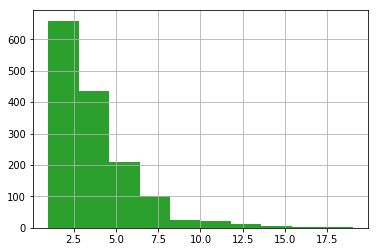

In [29]:
dui_ts['Reported_Date'].hist()
plt.show()

In [30]:
dui_ts['Reported_Date'].describe()

count    1473.000000
mean        3.449423
std         2.496803
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        19.000000
Name: Reported_Date, dtype: float64

In [31]:
dui_ts['Reported_Date'].idxmax()

Timestamp('2016-03-17 00:00:00')

In [33]:
dui_ts['Reported_Date'].sort_values(ascending = False)

Reported_Date
2016-03-17    19
2017-03-18    16
2017-08-26    15
2015-08-28    15
2017-12-16    14
2016-03-18    14
2016-05-21    14
2016-11-19    14
2018-01-20    14
2018-03-18    13
2018-02-03    13
2017-03-19    12
2014-04-19    12
2016-09-24    12
2017-03-17    12
2016-04-09    12
2014-05-03    12
2014-04-05    12
2015-01-01    12
2014-02-22    12
2014-04-12    11
2014-03-08    11
2014-09-06    11
2016-07-16    11
2014-04-04    11
2014-08-10    11
2014-07-04    11
2018-12-02    11
2015-04-25    11
2015-09-26    11
              ..
2018-05-03     1
2017-04-25     1
2014-12-10     1
2014-04-27     1
2015-04-27     1
2016-04-27     1
2017-04-28     1
2015-04-30     1
2017-04-30     1
2014-05-01     1
2018-05-01     1
2016-12-09     1
2015-12-09     1
2016-05-03     1
2014-05-04     1
2015-05-17     1
2016-11-01     1
2015-05-06     1
2015-05-07     1
2017-10-31     1
2017-05-08     1
2018-05-08     1
2014-05-11     1
2014-05-14     1
2015-05-14     1
2015-10-30     1
2017-12-07     1


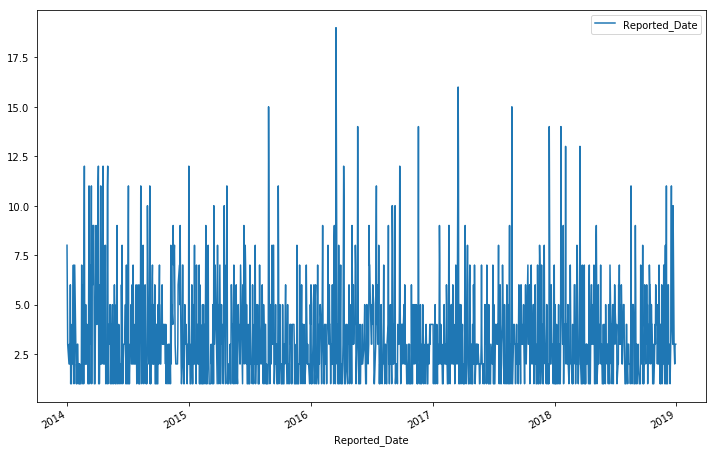

In [36]:
dui_ts.plot(kind = 'line', figsize = (12, 8))
plt.show()

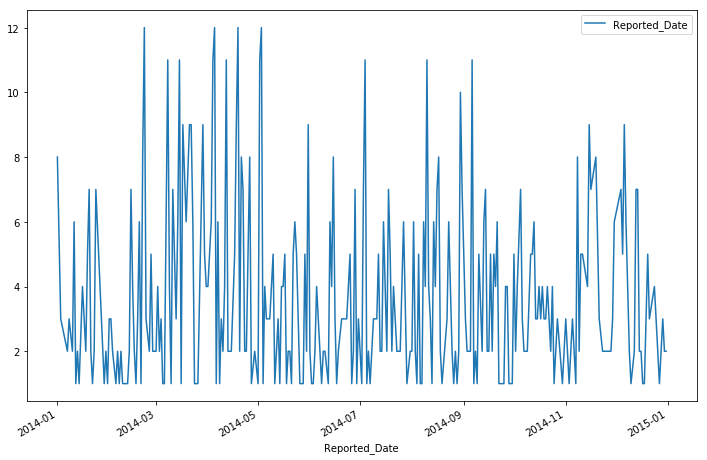

In [39]:
dui_ts['2014':'2014'].plot(kind = 'line', figsize = (12, 8))
plt.show()

In [40]:
dui_ts['Reported_Date'].resample('M').sum()

Reported_Date
2014-01-31     62
2014-02-28     76
2014-03-31    117
2014-04-30    128
2014-05-31    109
2014-06-30     76
2014-07-31     93
2014-08-31    109
2014-09-30     83
2014-10-31     79
2014-11-30     78
2014-12-31     77
2015-01-31     92
2015-02-28     84
2015-03-31     80
2015-04-30     95
2015-05-31     80
2015-06-30     79
2015-07-31     79
2015-08-31     96
2015-09-30     95
2015-10-31     62
2015-11-30     68
2015-12-31     72
2016-01-31     71
2016-02-29     83
2016-03-31    128
2016-04-30     87
2016-05-31     98
2016-06-30     70
2016-07-31     96
2016-08-31     70
2016-09-30    109
2016-10-31     58
2016-11-30     78
2016-12-31     42
2017-01-31     68
2017-02-28     72
2017-03-31    115
2017-04-30     79
2017-05-31     68
2017-06-30     65
2017-07-31     78
2017-08-31     80
2017-09-30     87
2017-10-31     98
2017-11-30     82
2017-12-31     97
2018-01-31     92
2018-02-28     67
2018-03-31     95
2018-04-30     79
2018-05-31     83
2018-06-30     74
2018-07-31    

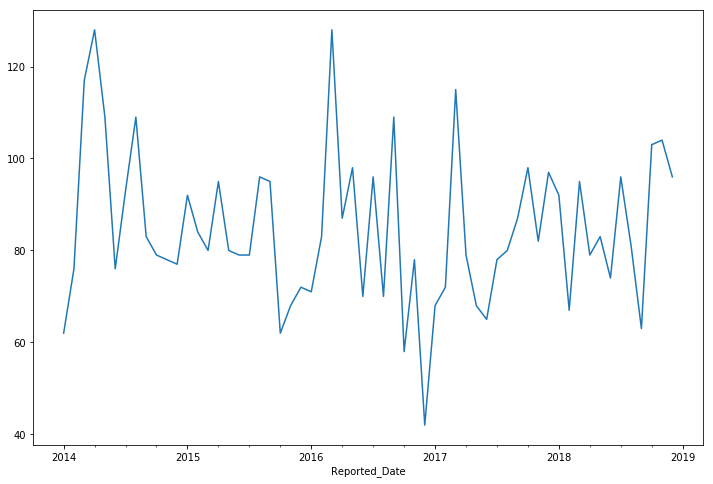

In [41]:
dui_ts['Reported_Date'].resample('M').sum().plot(kind = 'line', figsize = (12, 8))
plt.show()

In [42]:
dui_ts['Reported_Date'].resample('M').sum()['2016': '2016']

Reported_Date
2016-01-31     71
2016-02-29     83
2016-03-31    128
2016-04-30     87
2016-05-31     98
2016-06-30     70
2016-07-31     96
2016-08-31     70
2016-09-30    109
2016-10-31     58
2016-11-30     78
2016-12-31     42
Freq: M, Name: Reported_Date, dtype: int64

In [43]:
dui_ts['Reported_Date']['2016-12-01':'2016-12-31']

Reported_Date
2016-12-01    3
2016-12-02    5
2016-12-04    1
2016-12-05    3
2016-12-06    2
2016-12-09    1
2016-12-10    3
2016-12-12    4
2016-12-14    2
2016-12-15    1
2016-12-17    1
2016-12-18    3
2016-12-21    2
2016-12-23    4
2016-12-24    3
2016-12-25    4
Name: Reported_Date, dtype: int64

In [44]:
dui_ts['Reported_Date']['2014-12-01':'2014-12-31']

Reported_Date
2014-12-04    7
2014-12-05    5
2014-12-06    9
2014-12-07    6
2014-12-09    2
2014-12-10    1
2014-12-12    2
2014-12-13    7
2014-12-14    7
2014-12-15    2
2014-12-16    2
2014-12-17    1
2014-12-18    1
2014-12-19    3
2014-12-20    5
2014-12-21    3
2014-12-24    4
2014-12-27    1
2014-12-28    2
2014-12-29    3
2014-12-30    2
2014-12-31    2
Name: Reported_Date, dtype: int64

In [45]:
dui_ts['Reported_Date']['2015-12-01':'2015-12-31']

Reported_Date
2015-12-01    2
2015-12-02    3
2015-12-03    1
2015-12-04    4
2015-12-05    6
2015-12-06    2
2015-12-07    4
2015-12-08    4
2015-12-09    1
2015-12-11    2
2015-12-12    4
2015-12-13    2
2015-12-15    1
2015-12-17    2
2015-12-18    5
2015-12-19    7
2015-12-20    5
2015-12-22    2
2015-12-23    3
2015-12-24    2
2015-12-26    2
2015-12-29    1
2015-12-30    2
2015-12-31    5
Name: Reported_Date, dtype: int64

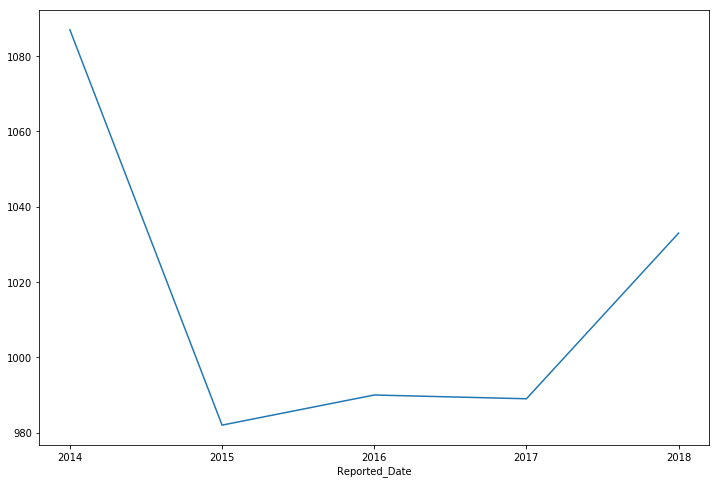

In [46]:
dui_ts['Reported_Date'].resample('Y').sum().plot(kind = 'line', figsize = (12, 8))
plt.show()

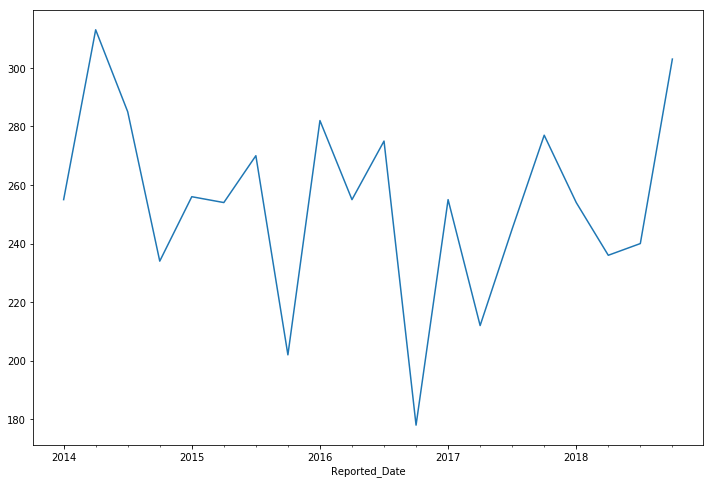

In [47]:
dui_ts['Reported_Date'].resample('Q').sum().plot(kind = 'line', figsize = (12, 8))
plt.show()

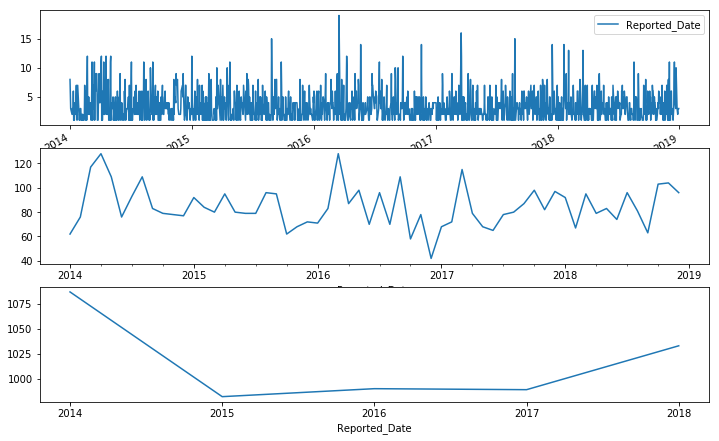

In [51]:
fig = plt.figure(figsize = (12, 8))

ax1 = plt.subplot(3, 1, 1)
dui_ts.plot(kind = 'line', ax = ax1)

ax2 = plt.subplot(3, 1, 2)
dui_ts['Reported_Date'].resample('M').sum().plot(kind = 'line', ax = ax2)

ax3 = plt.subplot(3, 1, 3)
dui_ts['Reported_Date'].resample('Y').sum().plot(kind = 'line', ax = ax3)
plt.show()

In [52]:
dui_prophet = dui_ts.copy()

In [56]:
dui_prophet.columns = ['y']

In [57]:
dui_prophet.reset_index(inplace = True)

In [58]:
dui_prophet.columns = ['ds', 'y']

In [59]:
dui_prophet

,ds,y
0,2014-01-01,8
1,2015-01-01,12
2,2016-01-01,4
3,2018-01-01,1
4,2015-01-02,2
5,2016-01-02,6
6,2017-01-02,4
7,2018-01-02,1
8,2014-01-03,3
9,2015-01-03,3


In [60]:
from fbprophet import Prophet as proph

In [61]:
Model = proph()

In [62]:
Model.fit(dui_prophet)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [63]:
future = Model.make_future_dataframe(periods = 365)

In [65]:
forecast = Model.predict(future)

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:1134: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  seasonal = np.matmul(seasonal_features.as_matrix(), beta) * self.y_scale


/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()


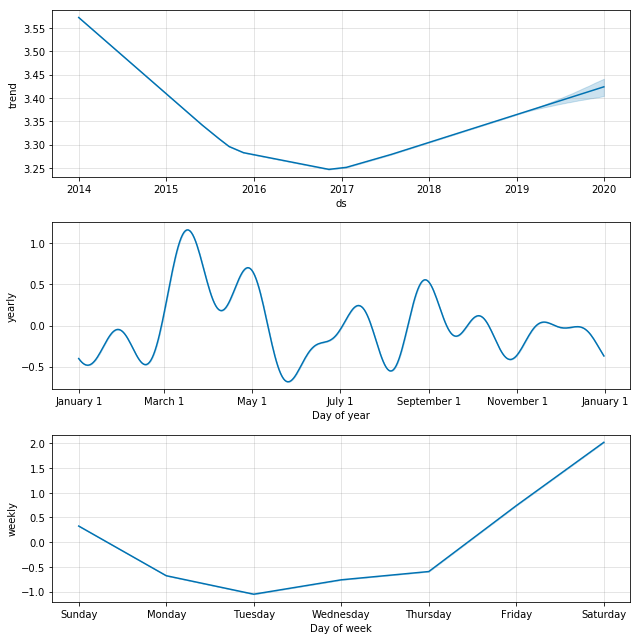

In [66]:
Model.plot_components(forecast)
plt.show()

In [67]:
dui.columns

Index(['Address', 'Age', 'Area', 'Beat', 'City', 'DVFlag', 'Description',
       'Firearm Used Flag', 'Firearm Used Flag  ', 'From Time', 'From_Date',
       'From_Time', 'IBRS', 'Invl_No', 'Involvement', 'Latitude', 'Location',
       'Location 1', 'Longitude', 'Offense', 'Race', 'Rep_Dist', 'Report_No',
       'Reported Time', 'Reported_Date', 'Reported_Time', 'Sex', 'To Time',
       'To_Date', 'To_Time', 'Zip Code'],
      dtype='object')

In [70]:
dui[['Reported Time', 'Reported_Time', 'To Time', 'To_Time']].isnull().sum() / len(dui.index)

Reported Time    0.592797
Reported_Time    0.407203
To Time          0.984058
To_Time          0.981106
dtype: float64

In [71]:
dui['Reported_Time'] = dui['Reported_Time'].fillna(dui['Reported Time'])
dui['Reported_Time'] = dui['Reported_Time'].fillna(dui['To Time'])
dui['Reported_Time'] = dui['Reported_Time'].fillna(dui['To_Time'])

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [72]:
dui[['Reported Time', 'Reported_Time', 'To Time', 'To_Time']].isnull().sum() / len(dui.index)

Reported Time    0.592797
Reported_Time    0.000000
To Time          0.984058
To_Time          0.981106
dtype: float64

In [74]:
dui.columns

Index(['Address', 'Age', 'Area', 'Beat', 'City', 'DVFlag', 'Description',
       'Firearm Used Flag', 'Firearm Used Flag  ', 'From Time', 'From_Date',
       'From_Time', 'IBRS', 'Invl_No', 'Involvement', 'Latitude', 'Location',
       'Location 1', 'Longitude', 'Offense', 'Race', 'Rep_Dist', 'Report_No',
       'Reported Time', 'Reported_Date', 'Reported_Time', 'Sex', 'To Time',
       'To_Date', 'To_Time', 'Zip Code'],
      dtype='object')

In [76]:
dui[['Reported_Date', 'To_Date']].isnull().sum() / len(dui.index)

Reported_Date    0.00000
To_Date          0.96851
dtype: float64

In [77]:
dui['Date_Time'] = dui['Reported_Date'] + ' ' + dui['Reported_Time']

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
df_dui = pd.DataFrame(dui.groupby('Date_Time')['Date_Time'].count())

In [81]:
df_dui.columns = ['y']

In [82]:
df_dui.reset_index(inplace = True)
df_dui.columns = ['ds', 'y']

In [85]:
df_dui['ds'] = pd.to_datetime(df_dui['ds'])

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:1134: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  seasonal = np.matmul(seasonal_features.as_matrix(), beta) * self.y_scale


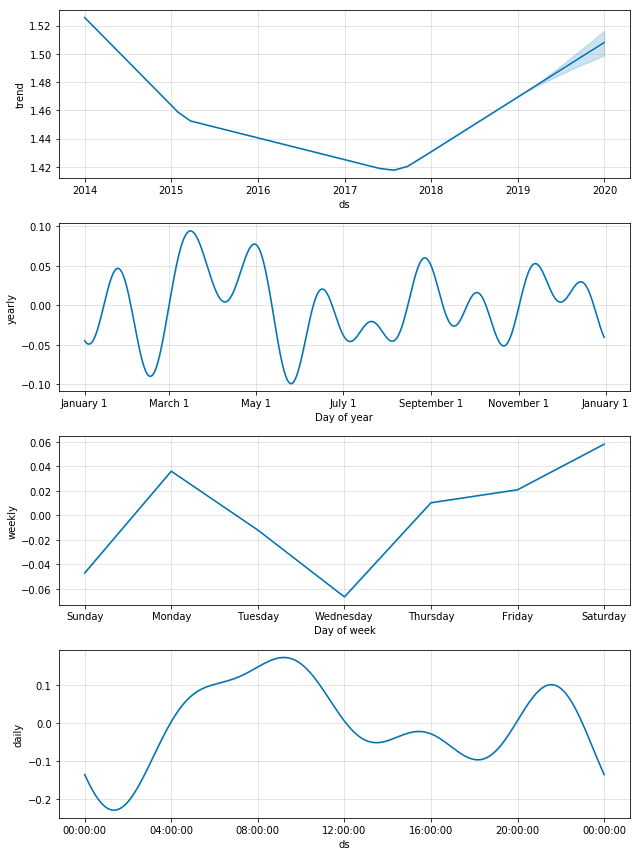

In [87]:
Model = proph()
Model.fit(df_dui)
future = Model.make_future_dataframe(periods = 365)
forecast = Model.predict(future)
Model.plot_components(forecast)
plt.show()

In [88]:
dui_ts.head()

,Reported_Date
Reported_Date,
2014-01-01,8
2015-01-01,12
2016-01-01,4
2018-01-01,1
2015-01-02,2


In [89]:
dui_ts.index

DatetimeIndex(['2014-01-01', '2015-01-01', '2016-01-01', '2018-01-01',
               '2015-01-02', '2016-01-02', '2017-01-02', '2018-01-02',
               '2014-01-03', '2015-01-03',
               ...
               '2015-12-29', '2017-12-29', '2018-12-29', '2014-12-30',
               '2015-12-30', '2017-12-30', '2018-12-30', '2014-12-31',
               '2015-12-31', '2017-12-31'],
              dtype='datetime64[ns]', name='Reported_Date', length=1473, freq=None)